# A Case study on "Flight Fare Prediction"

# METHOD II:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

C:\Users\Aeon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn import datasets, linear_model
from sklearn import cross_validation as cv
from scipy import linalg
import seaborn as sns

# Data reading

In [4]:
data = pd.read_excel('winner.xlsx')
data.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare_1,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03,114.47
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94,122.47
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12,214.42
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86,69.40
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42,158.13


In [5]:
data1 = data.drop(['Average_fare_1'], axis = 1)
data1.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528,424.56,FL,70.19,FL,70.19,111.03,114.47
1,CAK,MCO,860,276.84,FL,75.10,DL,17.23,118.94,122.47
2,ALB,ATL,852,215.76,DL,78.89,CO,2.77,167.12,214.42
3,ALB,BWI,288,606.84,WN,96.97,WN,96.97,68.86,69.40
4,ALB,ORD,723,313.04,UA,39.79,WN,15.34,145.42,158.13


In [5]:
data1.describe()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1056.973000,672.279140,60.128590,34.551480,143.193090,163.37542
std,643.203251,766.519254,19.367779,27.096999,47.229184,55.36547
min,108.000000,181.410000,17.680000,1.060000,49.610000,50.52000
25%,553.500000,257.197500,46.510000,13.195000,113.767500,125.97500
50%,919.000000,404.780000,59.240000,26.140000,137.825000,161.34500
75%,1452.500000,769.912500,73.510000,52.972500,168.530000,197.39250
max,2724.000000,8950.760000,100.000000,100.000000,387.940000,401.23000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Distance                     1000 non-null int64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
market_share                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share_1               1000 non-null float64
price                        1000 non-null float64
Average_Fare                 1000 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 78.2+ KB


In [7]:
data1.describe(include= ['O'])

,City1,City2,market_leading_airline,Low_price_airline
count,1000,1000,1000,1000
unique,90,85,16,19
top,ATL,TPA,WN,WN
freq,64,46,257,230


In [8]:
data1.isnull().any()

City1                        False
City2                        False
Distance                     False
Average_weekly_passengers    False
market_leading_airline       False
market_share                 False
Low_price_airline            False
market_share_1               False
price                        False
Average_Fare                 False
dtype: bool

# Exploratory Data Analysis

count    1000.00000
mean      163.37542
std        55.36547
min        50.52000
25%       125.97500
50%       161.34500
75%       197.39250
max       401.23000
Name: Average_Fare, dtype: float64


C:\Users\Aeon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


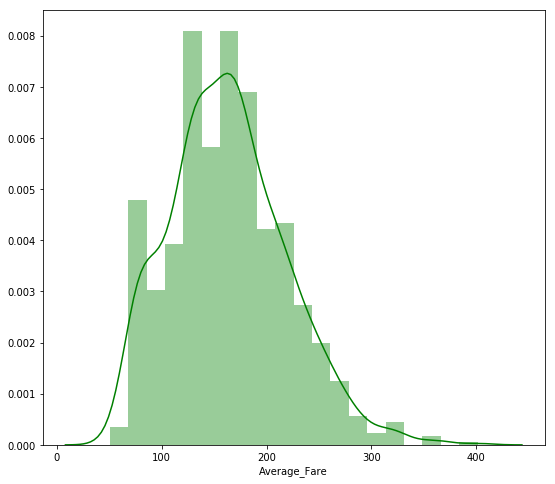

In [9]:
print(data1['Average_Fare'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data1['Average_Fare'], color='g', bins=20, hist_kws={'alpha': 0.4});

In [10]:
#With this information we can see that the prices are slightly skewed right and some outliers lies above ~350. 
#We will eventually want to get rid of the them to get a normal distribution of the independent variable (`Average_Fare`)
#for machine learning (assumption for fitting linear reg)

In [11]:
list(set(data1.dtypes.tolist())) # distance is the only integer variable, 4 float, and 3 objects among Independent variables

[dtype('O'), dtype('float64'), dtype('int64')]

In [12]:
data1_num = data1.select_dtypes(include = ['float64', 'int64'])
data1_num.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare
0,528,424.56,70.19,70.19,111.03,114.47
1,860,276.84,75.10,17.23,118.94,122.47
2,852,215.76,78.89,2.77,167.12,214.42
3,288,606.84,96.97,96.97,68.86,69.40
4,723,313.04,39.79,15.34,145.42,158.13


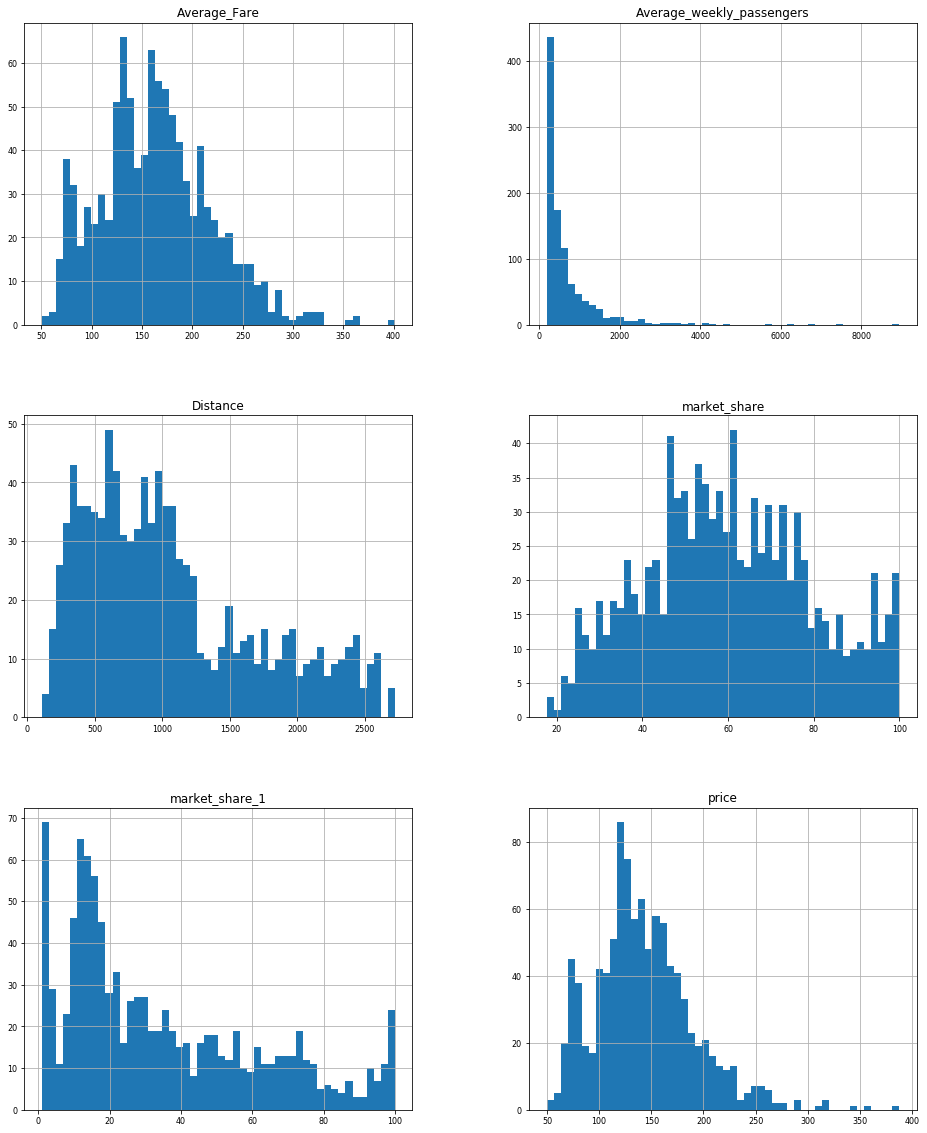

In [13]:
data1_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [14]:
# price, market_share, distance have similar dist like Y (average_fare)

In [15]:
# average_weekly_passengers, market_share_1 ..... not normal

In [16]:
data1_num_corr = data1_num.corr()['Average_Fare'][:-1] # -1 because the latest row is Average_Fare
golden_features_list = data1_num_corr[abs(data1_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Average_Fare:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Average_Fare:
price       0.866410
Distance    0.587169
Name: Average_Fare, dtype: float64


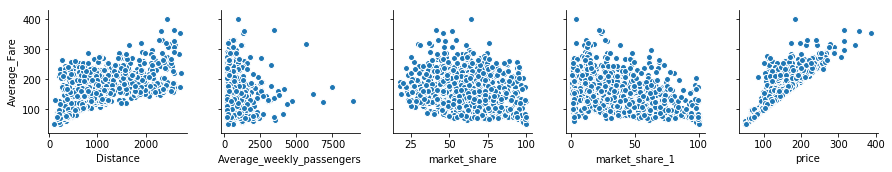

In [17]:
for i in range(0, len(data1_num.columns), 6):
    sns.pairplot(data=data1_num,
                x_vars=data1_num.columns[i:i+5],
                y_vars=['Average_Fare'])

In [18]:
# we can see that out of these numerical features, distance, price, market_share share some relationship with the target variable

In [19]:
# passengers - data is scattered with huge outliers, and most data is concentrated within sum of 2500. Very random, no pattern

In [20]:
# market_share1 seems to be uniformly distributed.

In [21]:
# By looking at correlation between numerical values we discovered 2 features which have a strong relationship to a
# Y. Besides correlation, we didn't find any notable pattern on the datas which are not correlated

In [22]:
# Check for multicollinearity

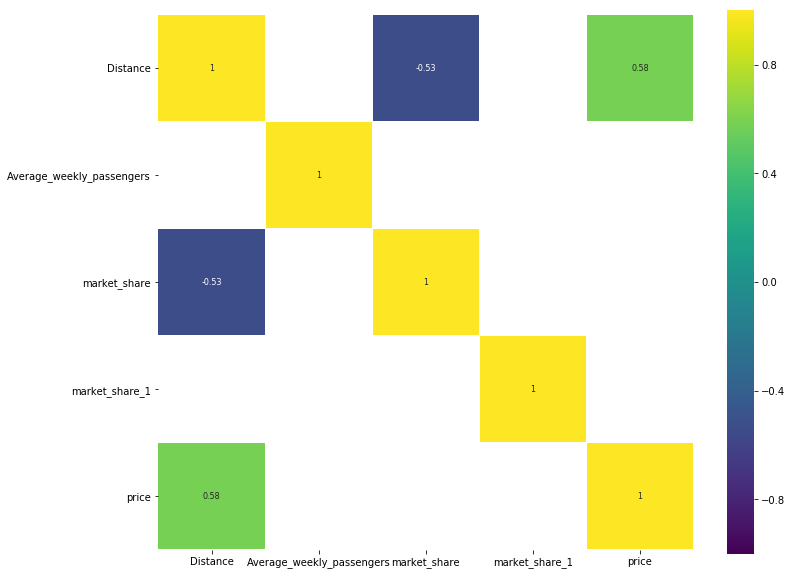

In [23]:
corr = data1_num.drop('Average_Fare', axis=1).corr() # We already examined Y correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [24]:
# the correlation between distance and price is highest 0.58
# the correlation between distance and market_share is 2nd highest -0.53
# the market_share and price however share a low correlation of -0.31 (so we will keep them both)
# market_share_1 has a higher correlation 0.37 (>0.31) with distance as compared to market_share but still it is less
# average_weekly_passengers doesn't have correlation with any of the features nor with the target variable

In [25]:
# Numercial data exploration:

In [26]:
#Let's now examine the quantitative features of our dataframe and how they relate to the average_fare which is also 
#quantitative 

In [27]:
quantitative_features_list = ['Distance', 'Average_weekly_passengers', 'market_share', 'market_share_1', 'price', 'Average_Fare']
data1_quantitative_values = data1[quantitative_features_list]
data1_quantitative_values.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare
0,528,424.56,70.19,70.19,111.03,114.47
1,860,276.84,75.10,17.23,118.94,122.47
2,852,215.76,78.89,2.77,167.12,214.42
3,288,606.84,96.97,96.97,68.86,69.40
4,723,313.04,39.79,15.34,145.42,158.13


In [28]:
#Still, we have a lot of features to analyse here so let's take the strongly correlated quantitative features from this 
#dataset and analyse them one by one

In [29]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('Average_Fare')
features_to_analyse

['Distance', 'price', 'Average_Fare']

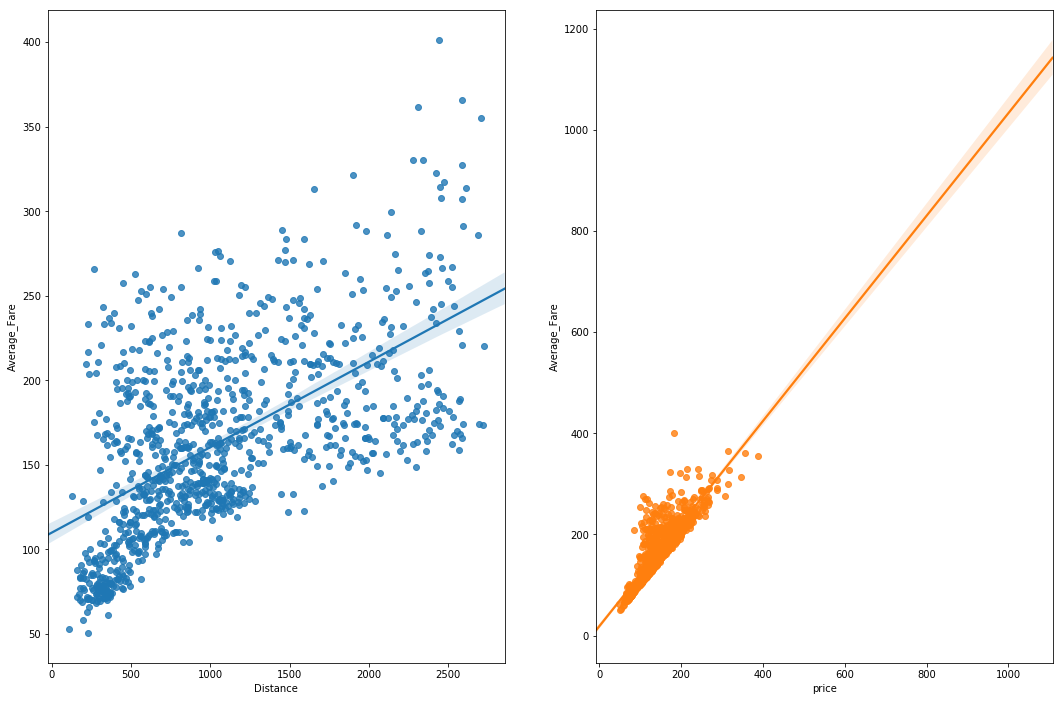

In [30]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 2, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Average_Fare', data=data1[features_to_analyse], ax=ax)

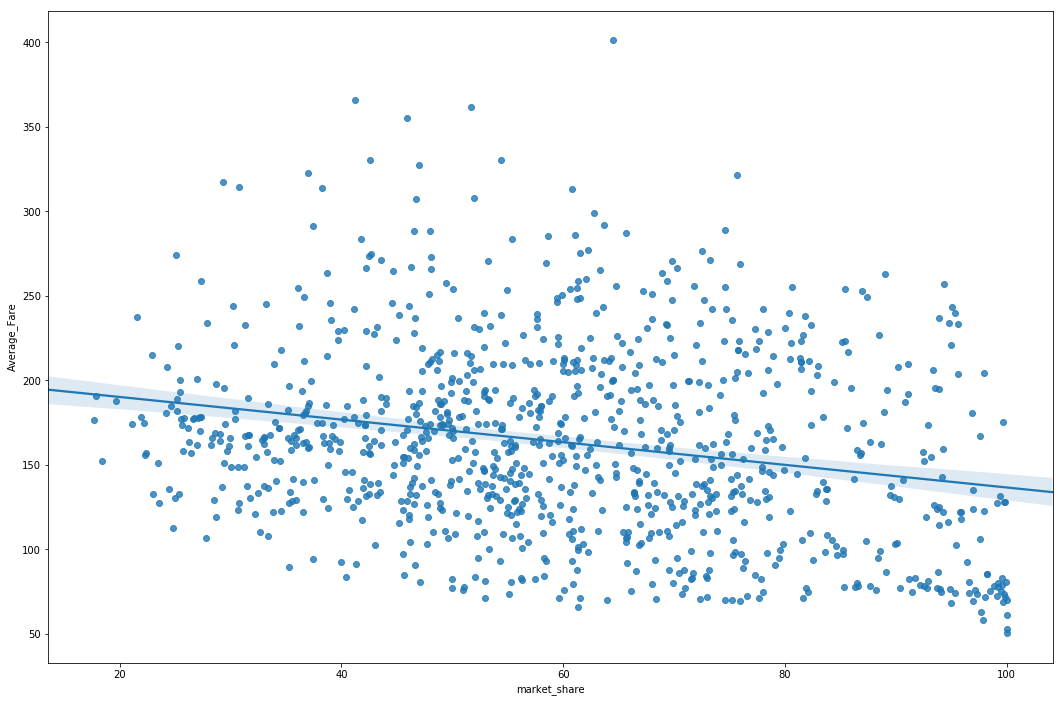

In [31]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 1, figsize = (18, 12))
sns.regplot(x=data1.market_share,y='Average_Fare', data=data1, ax=ax)

In [32]:
# Categorical feature exploration:

In [33]:
data1_cat = data1.select_dtypes(include = ['object'])
data1_cat.head()

,City1,City2,market_leading_airline,Low_price_airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN


In [34]:
x=data1.groupby(['City1', 'Average_Fare'], as_index = False).count().sort_values(by = 'Average_Fare',ascending = False)
x.head()

,City1,Average_Fare,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
967,SFO,401.23,1,1,1,1,1,1,1,1
673,LGA,365.93,1,1,1,1,1,1,1,1
645,LAX,361.57,1,1,1,1,1,1,1,1
195,BOS,355.15,1,1,1,1,1,1,1,1
644,LAX,330.28,1,1,1,1,1,1,1,1


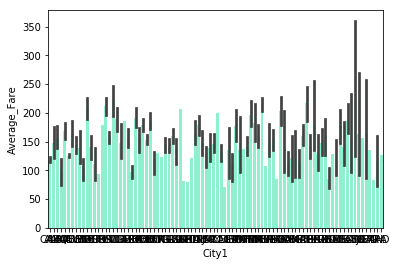

In [35]:
sns.barplot('City1', 'Average_Fare', data=np.round(data1,3), color="aquamarine")
plt.show()

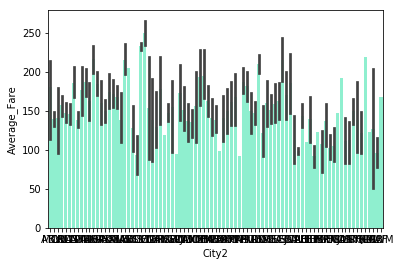

In [36]:
sns.barplot('City2', 'Average_Fare', data=np.round(data1,3), color="aquamarine")
plt.show()

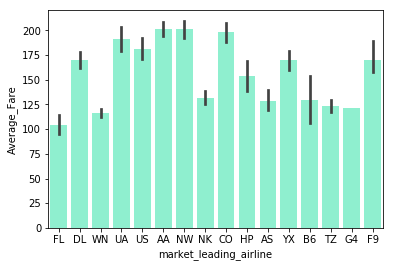

In [37]:
sns.barplot('market_leading_airline', 'Average_Fare', data=np.round(data1,3), color="aquamarine")
plt.show()

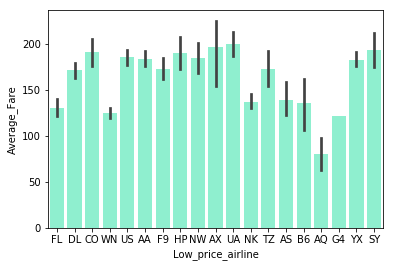

In [38]:
sns.barplot('Low_price_airline', 'Average_Fare', data=np.round(data1,3), color="aquamarine")
plt.show()

In [39]:
#Categorical variables have too many variables for City1 and City2, encoding is not an option for themn but this time 
# we will keep the categorical variables Low_price_airlin and market_leading_airline as the no. of levels are reasonable !

In [40]:
data1.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528,424.56,FL,70.19,FL,70.19,111.03,114.47
1,CAK,MCO,860,276.84,FL,75.10,DL,17.23,118.94,122.47
2,ALB,ATL,852,215.76,DL,78.89,CO,2.77,167.12,214.42
3,ALB,BWI,288,606.84,WN,96.97,WN,96.97,68.86,69.40
4,ALB,ORD,723,313.04,UA,39.79,WN,15.34,145.42,158.13


# Check for outliers and treatment:

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


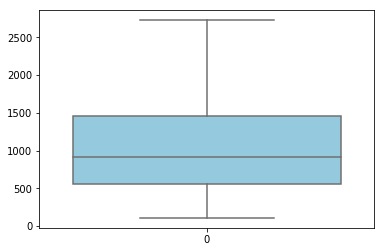

In [41]:
# library & dataset
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,2], color="skyblue")  ##Distance
#sns.plt.show()

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


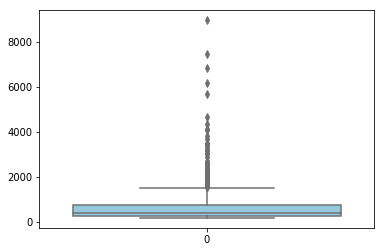

In [42]:
# library & dataset
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,3], color="skyblue")  ##Average weekly pass
#sns.plt.show()

In [43]:
# huge no. of outliers

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


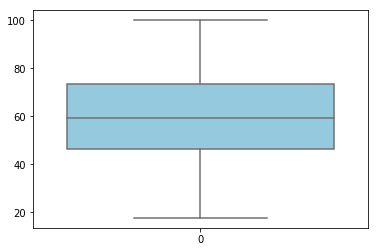

In [44]:
# library & dataset
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,5], color="skyblue")  ##market_share
#sns.plt.show()

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


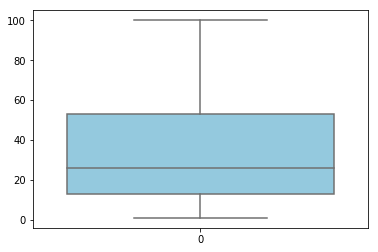

In [45]:
# library & dataset
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,7], color="skyblue")  ## market_share1
#sns.plt.show()

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


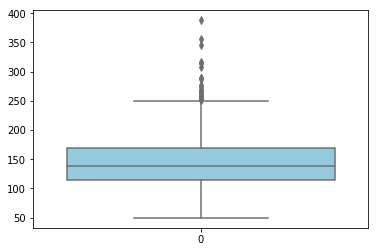

In [6]:
# library & dataset
import seaborn as sns
 
sns.boxplot(data=data1.ix[:,8], color="skyblue")  ##Price
#sns.plt.show()

In [46]:
#outlier treatment -  clubbing beyond P1 and P99 percentiles

In [47]:
# outlier treatment for numerical variables
dist = data1_num['Distance'].values  #series to array 
p1_dist = np.percentile(dist, 1) #percentile values
p2_dist = np.percentile(dist, 99)
print(p1_dist, p2_dist)

187.95 2586.01


In [48]:
# outlier treatment for numerical variables
passe = data1_num['Average_weekly_passengers'].values  #series to array 
p1_passe = np.percentile(passe, 1) #percentile values
p2_passe = np.percentile(passe, 99)
print(p1_passe, p2_passe)

184.33679999999998 3699.3012999999996


In [49]:
# outlier treatment for numerical variables
ms = data1_num['market_share'].values  #series to array 
p1_ms = np.percentile(ms, 1) #percentile values
p2_ms = np.percentile(ms, 99)
print(p1_ms, p2_ms)

22.9443 99.6801


In [50]:
# outlier treatment for numerical variables
ms1 = data1_num['market_share_1'].values  #series to array 
p1_ms1 = np.percentile(ms1, 1) #percentile values
p2_ms1 = np.percentile(ms1, 99)
print(p1_ms1, p2_ms1)

1.3099 99.6801


In [51]:
data1_list = [data1]

for dataset1 in data1_list:
    dataset1.loc[dataset1.Distance < 187.95, 'Distance' ] = 187.95
    dataset1.loc[dataset1.Distance > 2586.01, 'Distance' ] = 2586.01
    
    dataset1.loc[dataset1.Average_weekly_passengers < 184.33, 'Average_weekly_passengers' ] = 184.33
    dataset1.loc[dataset1.Average_weekly_passengers > 3699.30, 'Average_weekly_passengers' ] = 3699.30
    
    dataset1.loc[dataset1.market_share < 22.9443, 'market_share' ] = 22.9443 
    dataset1.loc[dataset1.market_share > 99.6801, 'market_share' ] = 99.6801
    
    dataset1.loc[dataset1.market_share_1 < 1.3099, 'market_share_1' ] = 1.3099
    dataset1.loc[dataset1.market_share_1 > 99.6801, 'market_share_1' ] = 99.6801

# Categorical data - dummy treatment

In [52]:
df1 = data1
df1.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare
0,CAK,ATL,528.0,424.56,FL,70.19,FL,70.19,111.03,114.47
1,CAK,MCO,860.0,276.84,FL,75.10,DL,17.23,118.94,122.47
2,ALB,ATL,852.0,215.76,DL,78.89,CO,2.77,167.12,214.42
3,ALB,BWI,288.0,606.84,WN,96.97,WN,96.97,68.86,69.40
4,ALB,ORD,723.0,313.04,UA,39.79,WN,15.34,145.42,158.13


In [53]:
City1_Dum = pd.get_dummies(df1.City1,prefix='C1',drop_first=True)
City1_Dum.head()

,C1_ACY,C1_ALB,C1_AMA,C1_ATL,C1_AUS,C1_BDL,C1_BHM,C1_BNA,C1_BOI,C1_BOS,...,C1_SFO,C1_SJC,C1_SLC,C1_SMF,C1_SNA,C1_STL,C1_SYR,C1_TLH,C1_TPA,C1_TYS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
City2_Dum = pd.get_dummies(df1.City2,prefix='C2',drop_first=True)
City2_Dum.head()

,C2_AUS,C2_BDL,C2_BHM,C2_BNA,C2_BOS,C2_BUF,C2_BWI,C2_CLE,C2_CLT,C2_CMH,...,C2_SLC,C2_SMF,C2_SNA,C2_SRQ,C2_STL,C2_SYR,C2_TLH,C2_TPA,C2_TUL,C2_TUS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Too many columns created for City1 and City2 (as discussed before) drop them !

In [56]:
MLA_Dum = pd.get_dummies(df1.market_leading_airline,prefix='MLA',drop_first=True)
MLA_Dum.head()

,MLA_AS,MLA_B6,MLA_CO,MLA_DL,MLA_F9,MLA_FL,MLA_G4,MLA_HP,MLA_NK,MLA_NW,MLA_TZ,MLA_UA,MLA_US,MLA_WN,MLA_YX
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
LPA_Dum = pd.get_dummies(df1.Low_price_airline,prefix='LPA',drop_first=True)
LPA_Dum.head()

,LPA_AQ,LPA_AS,LPA_AX,LPA_B6,LPA_CO,LPA_DL,LPA_F9,LPA_FL,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
# final data for modelling !!

In [59]:
modeldata = pd.concat([df1, MLA_Dum, LPA_Dum],axis=1)
modeldata.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price,Average_Fare,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,CAK,ATL,528.0,424.56,FL,70.19,FL,70.19,111.03,114.47,...,0,0,0,0,0,0,0,0,0,0
1,CAK,MCO,860.0,276.84,FL,75.10,DL,17.23,118.94,122.47,...,0,0,0,0,0,0,0,0,0,0
2,ALB,ATL,852.0,215.76,DL,78.89,CO,2.77,167.12,214.42,...,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,288.0,606.84,WN,96.97,WN,96.97,68.86,69.40,...,0,0,0,0,0,0,0,0,1,0
4,ALB,ORD,723.0,313.04,UA,39.79,WN,15.34,145.42,158.13,...,0,0,0,0,0,0,0,0,1,0


In [60]:
modeldata1 = modeldata.drop(['City1', 'City2', 'market_leading_airline', 'Low_price_airline'], axis = 1)
modeldata1.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,528.0,424.56,70.19,70.19,111.03,114.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860.0,276.84,75.10,17.23,118.94,122.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,852.0,215.76,78.89,2.77,167.12,214.42,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,288.0,606.84,96.97,96.97,68.86,69.40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,723.0,313.04,39.79,15.34,145.42,158.13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Cross validation 

In [61]:
df_train, df_test = cv.train_test_split(modeldata1,test_size=0.30,random_state=1234)

In [62]:
df_train.shape, df_test.shape

((700, 39), (300, 39))

In [63]:
XTrain = df_train.iloc[:,list(range(5)) + list(range(6,df_train.shape[1]))].as_matrix()
YTrain = df_train['Average_Fare']

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [65]:
XTest = df_test.iloc[:,list(range(5)) + list(range(6,df_test.shape[1]))].as_matrix()
YTest = df_test['Average_Fare']

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [66]:
XTrain.shape,YTrain.shape

((700, 38), (700,))

In [67]:
XTest.shape,YTest.shape

((300, 38), (300,))

# Model 1 -- Machine learning approach

In [68]:
#multiple linear regression model
regr = linear_model.LinearRegression(normalize=True)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [69]:
regr.fit(XTrain,YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [70]:
regr.score(XTrain,YTrain)

0.8737640723484686

In [71]:
regr.score(XTest,YTest)

0.8568472244187115

In [72]:
XTrain.shape

(700, 38)

In [75]:
# Prediction !!

In [73]:
y_pred = regr.predict(XTest)

# Statistical Parameters for model performance check !

In [77]:
from scipy import stats

In [74]:
#adjusted R square
def AdjustedRSquare(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0)
    R2 = 1- sse/sst
    adjR2 = R2-(1-R2)*(float(k)/(n-k-1))
    return adjR2, R2

In [75]:
def ReturnPValue(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    x = np.hstack((np.ones((n,1)),np.matrix(X)))
    df = float(n-k-1)
    sampleVar = sse/df
    sampleVarianceX = x.T*x
    covarianceMatrix = linalg.sqrtm(sampleVar*sampleVarianceX.I)
    se = covarianceMatrix.diagonal()[1:]
    betasTstat = np.zeros(len(se))
    for i in range(len(se)):
        betasTstat[i] = model.coef_[i]/se[i]
    betasPvalue = 1- stats.t.cdf(abs(betasTstat),df)
    return betasPvalue

In [76]:
regr.adjR2, regr.R2 = AdjustedRSquare(regr,XTrain,YTrain)
print (regr.adjR2, regr.R2)

0.866506938837488 0.8737640723484686


In [77]:
np.round(regr.coef_,1)

array([  0. ,   0. ,   0.5,  -0.4,   0.8, -19.5, -22.6,   0.2,  -1.3,
        12.2, -10.2,  -0. , -11.4, -13. ,  13.8, -27.7,   2.8,  -7.5,
       -19.3,   0.4,   1.4,  10.3,  37.7,  22. ,  20.3,   7.6,   7.7,
        -2.2,   0. ,   4.4,   4.3,  12.9,  24.3,  31.3,  11.9,  15.4,
        10.5,  -1.6])

In [78]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [79]:
y_pred = regr.predict(XTest)

# Regression plots: Residual plot, Quantile plot and leverage plot !

In [80]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [81]:
#####df_train.to_csv('xxxx1.csv')

In [82]:
auto = pd.read_csv('xxxx1.csv')
auto.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,MLA_AS,MLA_B6,MLA_CO,MLA_DL,MLA_F9,...,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX,Average_Fare
0,852.0,444.23,97.01,2.69,100.80,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123.98
1,563.0,513.04,52.22,52.22,102.42,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,108.13
2,413.0,2569.56,63.04,63.04,161.58,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,163.37
3,599.0,404.78,63.10,33.83,133.85,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,142.71
4,321.0,323.36,94.85,94.85,75.58,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,76.70


In [83]:
#auto = auto.drop(['Unnamed: 0'], axis = 1)
#auto.head()

In [84]:
auto.isnull().any()

Distance                     False
Average_weekly_passengers    False
market_share                 False
market_share_1               False
price                        False
MLA_AS                       False
MLA_B6                       False
MLA_CO                       False
MLA_DL                       False
MLA_F9                       False
MLA_FL                       False
MLA_G4                       False
MLA_HP                       False
MLA_NK                       False
MLA_NW                       False
MLA_TZ                       False
MLA_UA                       False
MLA_US                       False
MLA_WN                       False
MLA_YX                       False
LPA_AQ                       False
LPA_AS                       False
LPA_AX                       False
LPA_B6                       False
LPA_CO                       False
LPA_DL                       False
LPA_F9                       False
LPA_FL                       False
LPA_G4              

In [85]:
model_f = 'Average_Fare ~ Distance+\
Average_weekly_passengers+\
market_share+\
market_share_1+\
price+\
MLA_AS+\
MLA_B6+\
MLA_CO+\
MLA_DL+\
MLA_F9+\
MLA_FL+\
MLA_G4+\
MLA_HP+\
MLA_NK+\
MLA_NW+\
MLA_TZ+\
MLA_UA+\
MLA_US+\
MLA_WN+\
MLA_YX+\
LPA_AQ+\
LPA_AS+\
LPA_AX+\
LPA_B6+\
LPA_CO+\
LPA_DL+\
LPA_F9+\
LPA_FL+\
LPA_G4+\
LPA_HP+\
LPA_NK+\
LPA_NW+\
LPA_SY+\
LPA_TZ+\
LPA_UA+\
LPA_US+\
LPA_WN+\
LPA_YX'

In [86]:
model = smf.ols(formula=model_f, data=auto)
model_fit = model.fit()

In [87]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

C:\Users\Aeon\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning: divide by zero encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\Users\Aeon\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:417: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)


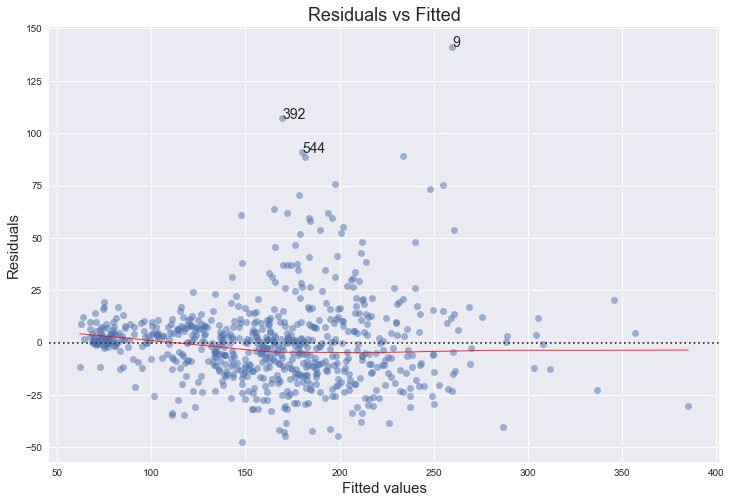

In [88]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Average_Fare', data=auto, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

In [89]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

ValueError: cannot convert float NaN to integer

<Figure size 864x576 with 1 Axes>

In [90]:
# Any abnormality noticed in the above graphs can be attributed to a huge no. of outliers present in the data, and  
# the normality in some features being low

# Model enhancement - L1 Regularisation

In [93]:
from sklearn.linear_model import Lasso

In [103]:
def ErrorMetric(model,X,Y):
    Yhat = model.predict(X)
    MAPE = np.mean(abs(Y-Yhat)/Y)*100
    MSSE = np.mean(np.square(Y-Yhat))
    return MAPE, MSSE

In [94]:
lassoMod = Lasso(alpha=0.9) # to make coeff zero and not near to zero

In [95]:
lassoMod.fit(XTrain,YTrain)

Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
print (lassoMod.coef_)

[ 1.09014383e-02  1.28605090e-03  4.40672116e-01 -5.30851016e-01
  8.75254480e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  8.07257852e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.12465299e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]


In [104]:
lassoMod.coef_[((lassoMod.coef_)!=0)] # refit the model with these features !

array([ 1.08084856e-02,  1.26848354e-03,  4.41079217e-01, -5.35609895e-01,
        8.78103434e-01,  6.78145836e+00, -8.57468030e+00])

In [105]:
lassoMod = Lasso(alpha=1)
lassoMod.fit(XTrain,YTrain)
print (lassoMod.coef_)

[ 1.08084856e-02  1.26848354e-03  4.41079217e-01 -5.35609895e-01
  8.78103434e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  6.78145836e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.57468030e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]


In [106]:
lassoMod.coef_[((lassoMod.coef_)!=0)]

array([ 1.08084856e-02,  1.26848354e-03,  4.41079217e-01, -5.35609895e-01,
        8.78103434e-01,  6.78145836e+00, -8.57468030e+00])

In [107]:
lassoMod.MAPE, lassoMod.MSSE = ErrorMetric(lassoMod, XTrain, YTrain)

In [108]:
print (lassoMod.MAPE, lassoMod.MSSE)

8.881224693747097 492.17080188569224


# Comaprison to stronger models: Random Forest, XGB Regression

# 1. Linear regression - revisited

In [675]:
# Rsquare, MSE, MAE for Linear regression

In [676]:
y_pred = regr.predict(XTest)
print('Liner Regression R squared: %.4f' % regr.score(XTest, YTest))

Liner Regression R squared: 0.8573


In [113]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, YTest)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 19.4330


In [678]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, YTest)
print('Linear Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 14.1521


# 2. Random Forest regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(XTrain, YTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [110]:
# Rsquare, MSE, MAE for RF regressor

In [111]:
print('Random Forest R squared": %.4f' % forest_reg.score(XTest, YTest))

Random Forest R squared": 0.8606


In [114]:
y_pred = forest_reg.predict(XTest)
forest_mse = mean_squared_error(y_pred, YTest)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 19.4330


In [115]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, YTest)
print('Random Forest MAE: %.4f' % lin_mae)

Random Forest MAE: 12.7978


# Gradient boosting regressor

In [116]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(XTrain, YTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [117]:
# Rsquare, MSE, MAE for XGB regressor

In [118]:
print('Gradient Boosting R squared": %.4f' % model.score(XTest, YTest))

Gradient Boosting R squared": 0.8766


In [119]:
y_pred = model.predict(XTest)
model_mse = mean_squared_error(y_pred, YTest)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 18.2857


In [120]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, YTest)
print('Gradient Boosting MAE: %.4f' % lin_mae)

Gradient Boosting MAE: 12.3971


# Variable importance/ Important Features 

In [687]:
#Feature Importance

In [121]:
feature_labels = np.array(['Distance',
'Average_weekly_passengers',
'market_share',
'market_share_1',
'price',
'Average_Fare',
'MLA_AS',
'MLA_B6',
'MLA_CO',
'MLA_DL',
'MLA_F9',
'MLA_FL',
'MLA_G4',
'MLA_HP',
'MLA_NK',
'MLA_NW',
'MLA_TZ',
'MLA_UA',
'MLA_US',
'MLA_WN',
'MLA_YX',
'LPA_AQ',
'LPA_AS',
'LPA_AX',
'LPA_B6',
'LPA_CO',
'LPA_DL',
'LPA_F9',
'LPA_FL',
'LPA_G4',
'LPA_HP',
'LPA_NK',
'LPA_NW',
'LPA_SY',
'LPA_TZ',
'LPA_UA',
'LPA_US',
'LPA_WN',
'LPA_YX'])


In [122]:
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

LPA_WN-0.00%
LPA_FL-0.00%
LPA_TZ-0.00%
LPA_AQ-0.00%
MLA_YX-0.00%
MLA_AS-0.00%
MLA_HP-0.00%
MLA_FL-0.00%
LPA_US-0.03%
LPA_HP-0.09%
LPA_NK-0.12%
LPA_AS-0.17%
LPA_UA-0.18%
LPA_B6-0.19%
MLA_UA-0.20%
MLA_CO-0.25%
LPA_G4-0.27%
MLA_F9-0.36%
LPA_NW-0.42%
LPA_DL-0.48%
MLA_DL-0.56%
LPA_AX-0.61%
MLA_WN-0.75%
MLA_NW-0.87%
MLA_TZ-1.16%
Average_Fare-1.20%
LPA_CO-1.30%
MLA_G4-1.36%
LPA_F9-1.51%
MLA_NK-1.80%
MLA_B6-1.87%
LPA_SY-2.04%
MLA_US-3.82%
Average_weekly_passengers-4.33%
market_share-10.07%
Distance-12.90%
price-24.75%
market_share_1-26.33%


In [123]:
#The most important features are Price, Distance, Market_shares and MLA_US (market lower price & US code)
#And the least important feature is Apartment, which means that regardless of whether this unit is an apartment or not, 
#does not matter to the sold price. Overall, most of these 19 features are used.

In [124]:
importance

array([0.12904096, 0.04327755, 0.10066097, 0.2632615 , 0.24753189,
       0.0119848 , 0.        , 0.01874935, 0.00252354, 0.00556616,
       0.00355797, 0.        , 0.01356865, 0.        , 0.01804544,
       0.00874875, 0.01159888, 0.00202053, 0.03823712, 0.00754494,
       0.        , 0.        , 0.00169823, 0.00607439, 0.00191249,
       0.01300637, 0.00475396, 0.01507469, 0.        , 0.00271931,
       0.00090233, 0.00121008, 0.00424269, 0.02040919, 0.        ,
       0.00178218, 0.00029511, 0.        ])

In [125]:
feature_labels

array(['Distance', 'Average_weekly_passengers', 'market_share',
       'market_share_1', 'price', 'Average_Fare', 'MLA_AS', 'MLA_B6',
       'MLA_CO', 'MLA_DL', 'MLA_F9', 'MLA_FL', 'MLA_G4', 'MLA_HP',
       'MLA_NK', 'MLA_NW', 'MLA_TZ', 'MLA_UA', 'MLA_US', 'MLA_WN',
       'MLA_YX', 'LPA_AQ', 'LPA_AS', 'LPA_AX', 'LPA_B6', 'LPA_CO',
       'LPA_DL', 'LPA_F9', 'LPA_FL', 'LPA_G4', 'LPA_HP', 'LPA_NK',
       'LPA_NW', 'LPA_SY', 'LPA_TZ', 'LPA_UA', 'LPA_US', 'LPA_WN',
       'LPA_YX'], dtype='<U25')

In [126]:
s1 = pd.Series([1.28809811e-01, 4.82013503e-02, 8.81036961e-02, 2.84759031e-01,
       2.55990082e-01, 1.10108792e-02, 0.00000000e+00, 7.37830398e-03,
       4.64288154e-03, 1.65860729e-03, 4.83427434e-03, 0.00000000e+00,
       1.24629454e-02, 6.09681274e-04, 1.64789058e-02, 9.28079948e-03,
       1.07467190e-02, 2.00195959e-03, 4.05158855e-02, 5.63861750e-03,
       0.00000000e+00, 0.00000000e+00, 1.98801812e-03, 8.07985263e-03,
       1.02477211e-03, 1.17531249e-02, 3.24378774e-03, 1.33235862e-02,
       0.00000000e+00, 3.12423860e-03, 7.92884187e-04, 0.00000000e+00,
       2.50576216e-03, 2.06694764e-02, 0.00000000e+00, 8.11236818e-05,
       2.88942409e-04, 0.00000000e+00], name='variable imp')

In [127]:
s2 = pd.Series(['Distance', 'Average_weekly_passengers', 'market_share',
       'market_share_1', 'price', 'MLA_AS', 'MLA_B6',
       'MLA_CO', 'MLA_DL', 'MLA_F9', 'MLA_FL', 'MLA_G4', 'MLA_HP',
       'MLA_NK', 'MLA_NW', 'MLA_TZ', 'MLA_UA', 'MLA_US', 'MLA_WN',
       'MLA_YX', 'LPA_AQ', 'LPA_AS', 'LPA_AX', 'LPA_B6', 'LPA_CO',
       'LPA_DL', 'LPA_F9', 'LPA_FL', 'LPA_G4', 'LPA_HP', 'LPA_NK',
       'LPA_NW', 'LPA_SY', 'LPA_TZ', 'LPA_UA', 'LPA_US', 'LPA_WN',
       'LPA_YX'], name='feature')

In [128]:
imp = pd.concat([s1, s2], axis=1)
imp.head()

,variable imp,feature
0,0.128810,Distance
1,0.048201,Average_weekly_passengers
2,0.088104,market_share
3,0.284759,market_share_1
4,0.255990,price


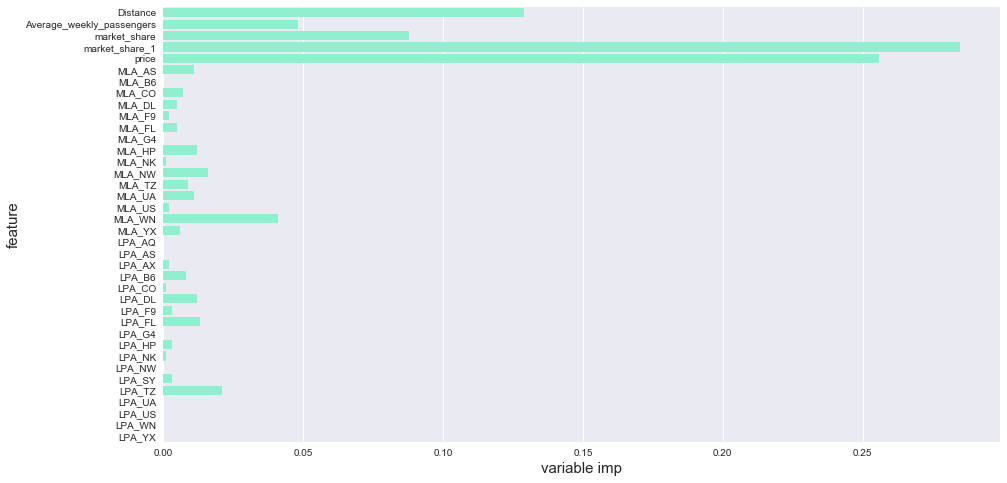

In [129]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.barplot('variable imp', 'feature', data=np.round(imp,3), color="aquamarine")

# Conclusions:

1.	Features like price, market_share, distance have similar distribution like average_fare
2.	Average_weekly_passengers, market_share_1 is strictly not normal
3.	We noticed that out of the numerical features, distance, price, market_share share some relationship with the target variable
4.	The passengers data is scattered with huge outliers, and most data is concentrated within sum of 2500. Very random, less pattern
5.	By looking at correlation between numerical values we discovered 2 features which have a strong relationship to the target variable
6.	The correlation between distance and price is highest 0.58
7.	The correlation between distance and market_share is 2nd highest -0.53
8.	Categorical variables like City1 and City2, has too many levels, so encoding is not an option for them but the categorical variables Low_price_airlin and market_leading_airline can be dummified as the no. of levels are reasonable 
9.	Any abnormality noticed in the regression graphs can be attributed to a huge no. of outliers present in the data, and  the normality in some features being low
10.	The most important features are Price, Distance, Market_shares and MLA_US (market lower price & US code) 
11.	RF and XGB has indeed reduced the RMSE and MPE errors.
12. by considering the categorical- numerical interaction, APPROACH B is indeed better than APPROACH A

# Recommendation:

1. Resort to APPROACH B combined with the models of Random Forest and XGB regression
2. Oulier treatment is a must for this data, which is effcienlty performed in APPROACH B

In [130]:
### PCA

In [131]:
modeldata1.head()

,Distance,Average_weekly_passengers,market_share,market_share_1,price,Average_Fare,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,528.0,424.56,70.19,70.19,111.03,114.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860.0,276.84,75.10,17.23,118.94,122.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,852.0,215.76,78.89,2.77,167.12,214.42,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,288.0,606.84,96.97,96.97,68.86,69.40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,723.0,313.04,39.79,15.34,145.42,158.13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [132]:
features = ['Distance', 'Average_weekly_passengers', 'market_share',
       'market_share_1', 'price', 'MLA_AS', 'MLA_B6',
       'MLA_CO', 'MLA_DL', 'MLA_F9', 'MLA_FL', 'MLA_G4', 'MLA_HP',
       'MLA_NK', 'MLA_NW', 'MLA_TZ', 'MLA_UA', 'MLA_US', 'MLA_WN',
       'MLA_YX', 'LPA_AQ', 'LPA_AS', 'LPA_AX', 'LPA_B6', 'LPA_CO',
       'LPA_DL', 'LPA_F9', 'LPA_FL', 'LPA_G4', 'LPA_HP', 'LPA_NK',
       'LPA_NW', 'LPA_SY', 'LPA_TZ', 'LPA_UA', 'LPA_US', 'LPA_WN',
       'LPA_YX']

In [133]:
# Separating out the features
x= modeldata1.loc[:, features].values

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

In [135]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[454040.80571564 366232.75074311   1447.70630905]
[0.55194495 0.44520297 0.00175987]
[0.55194495 0.99714792 0.99890779]


In [136]:
principalDf1.head()

,pc1,pc2,pc3
0,225.792605,-531.220837,-12.584499
1,-116.911004,-408.478128,-18.145323
2,-155.149811,-456.958209,30.331779
3,527.100713,-566.483346,-44.212400
4,5.754020,-475.647936,14.809687


In [137]:
result = principalDf1

Text(0.5,0.92,'PCA on the train data')

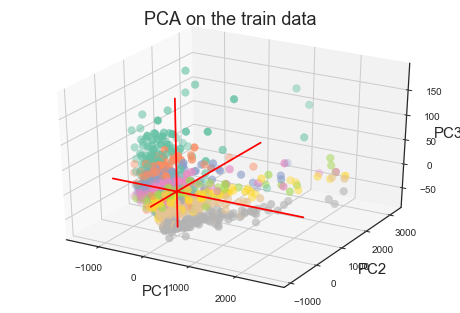

In [138]:
# Run The PCA
sns.set_style("white")
# Store results of PCA in a data frame
#result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
from mpl_toolkits.mplot3d import Axes3D
Axes3D = Axes3D  # pycharm auto import
modeldata1['Average_Fare']=pd.Categorical(modeldata1['Average_Fare'])
my_color=modeldata1['Average_Fare'].cat.codes

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['pc1'], result['pc2'], result['pc3'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['pc1']), max(result['pc1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['pc2']), max(result['pc2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['pc3']), max(result['pc3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the train data")

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])

In [140]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[4.54040806e+05 3.66232751e+05 1.44770631e+03 6.42440966e+02
 2.54638815e+02 2.29484517e-01 1.45959955e-01 1.37030554e-01
 1.08829897e-01]
[5.51944946e-01 4.45202971e-01 1.75987306e-03 7.80969551e-04
 3.09546202e-04 2.78967920e-07 1.77433082e-07 1.66578248e-07
 1.32296725e-07]
[0.55194495 0.99714792 0.99890779 0.99968876 0.99999831 0.99999859
 0.99999876 0.99999893 0.99999906]


In [141]:
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,225.792605,-531.220837,-12.584499,26.955319,3.631607,-0.739165,-0.159544,-0.024639,-0.294026
1,-116.911004,-408.478128,-18.145323,-18.898903,-13.443085,-0.312255,0.479944,-0.616525,-0.128899
2,-155.149811,-456.958209,30.331779,-30.860147,-19.260528,-0.268140,0.298394,0.720064,-0.189452
3,527.100713,-566.483346,-44.212400,52.010539,-15.896558,0.359918,0.034405,0.078167,-0.044877
4,5.754020,-475.647936,14.809687,-27.381556,22.812442,0.560142,-0.414661,0.200017,-0.573702


In [142]:
## Icreasing the no. of PC, n = 9 ! ()## Icreasing the no. of PC, n = 9 ! ()

C:\Users\Aeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD031D7CC0>,
      dtype=object)

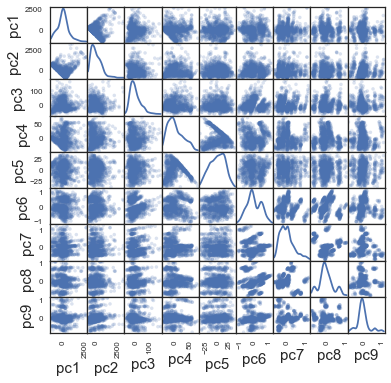

In [143]:
import numpy as np 
import pandas as pd
from pandas.tools.plotting import scatter_matrix

#now plot using pandas 
scatter_matrix(principalDf, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [176]:
from sklearn.cross_validation import train_test_split
#Join 'default' in to the train_pDf dataframe
train_principalDf_xy = pd.concat([principalDf, modeldata1['Average_Fare']], axis = 1) 

train_principalDf_xy_1 = train_principalDf_xy

#train_principal_DF_xy_1 is the final transformed train data set

X = train_principalDf_xy_1[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9']] 
Y = train_principalDf_xy_1['Average_Fare']

In [177]:
X.shape

(1000, 9)

In [178]:
Y.shape

(1000,)

In [179]:
from sklearn import cross_validation as cv

In [181]:
Xtrain, Xtest, Ytrain, Ytest = cv.train_test_split(X,Y,test_size = 0.30, random_state = 34)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((700, 9), (300, 9), (700,), (300,))

In [182]:
reg = linear_model.LinearRegression(normalize=True)
reg
reg.fit(Xtrain,Ytrain)
print('Coefficients: \n', np.round(reg.coef_,1))
print(reg.score(Xtrain,Ytrain))
print(reg.score(Xtest,Ytest))       #score less when n(PCA) = 8,10. So n = 9

Coefficients: 
 [ -0.    0.    0.9  -0.5  -0.6  -8.8 -14.3   0.5  -2.2]
0.8519379598556857
0.831662319382031


In [190]:
X = train_principalDf_xy_1[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9']] 
Y = train_principalDf_xy_1['Average_Fare']

In [191]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

In [192]:
n_folds = 5
y_train1 = modeldata1.values

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(Y)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [193]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [194]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [195]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [196]:
score = rmsle_cv(lasso)
print("\nLasso rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = rmsle_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost rmse score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso rmse score: 21.9992 (0.5294)

ElasticNet rmse score: 21.9993 (0.5295)

Gradient Boosting rmse score: 19.7466 (1.2409)

Xgboost rmse score: 20.1122 (1.0156)



In [197]:
GBoost.fit(Xtrain,Ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [198]:
GBoost.score(Xtrain,Ytrain)

0.9869883248033827

In [199]:
GBoost.score(Xtest,Ytest)

0.863554508962418

In [200]:
model_xgb.fit(Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [201]:
model_xgb.score(Xtrain,Ytrain)

0.999297093009709

In [202]:
model_xgb.score(Xtest,Ytest)

0.8591201351895635

In [204]:
y_pred_xgb = model_xgb.predict(Xtest)

In [206]:
y_pred_xgb.mean()

160.28148

In [207]:
GBoost.predict(Xtest).mean()

159.48696326959353